**Course website**: https://github.com/leomiquelutti/UFU-geofisica-1

**Note**: This notebook is part of the course "Geofísica 1" of Geology program of the 
[Universidade Federal de Uberlândia](http://www.ufu.br/). 
All content can be freely used and adapted under the terms of the 
[Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)

Agradecimentos especiais ao [Leonardo Uieda](www.leouieda.com)

Esse documento que você está usando é um [Jupyter notebook](http://jupyter.org/). É um documento interativo que mistura texto (como esse), código (como abaixo), e o resultado de executar o código (números, texto, figuras, videos, etc).

# Magnetometria - O IGRF e a anomalia magnética de campo total

## Objetivos

* Visualizar o campo magnético de referência [IGRF](http://en.wikipedia.org/wiki/International_Geomagnetic_Reference_Field).
* Verificar os efeitos da variação secular do campo geomagnético no último século.
* Visualizar o campo magnético induzido em um corpo para diferentes inclinações.
* Entender a relação entre campo magnético induzido, o campo magnético da Terra (IGRF) e a anomalia magnética de campo total.
* Entender o papel da inclinação magnética na forma da anomalia.

## Instruções

O notebook te fornecerá exemplos interativos que trabalham os temas abordados no questionário. Utilize esses exemplos para responder as perguntas.

As células com números ao lado, como `In [1]:`, são código [Python](http://python.org/). Algumas dessas células não produzem resultado e servem de preparação para os exemplos interativos. Outras, produzem gráficos interativos. **Você deve executar todas as células, uma de cada vez**, mesmo as que não produzem gráficos.

Para executar uma célula, clique em cima dela e aperte `Shift + Enter`. O foco (contorno verde ou cinza em torno da célula) deverá passar para a célula abaixo. Para rodá-la, aperte `Shift + Enter` novamente e assim por diante. Você pode executar células de texto que não acontecerá nada.

In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
import pandas
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import ipywidgets as widgets
from IPython.display import display
import seaborn
import fatiando
from fatiando import gridder, mesher, utils
from fatiando.gravmag import prism, sphere
from fatiando.vis import mpl

C:\Users\leomi\Anaconda2\lib\site-packages\fatiando\vis\mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [2]:
import fatiando
print('Versão do Fatiando a Terra: {}'.format(fatiando.__version__))

Versão do Fatiando a Terra: 0.5


## International Geomagnetic Reference Field (IGRF)

Abaixo, vamos fazer gráficos do IGRF calculado para a Terra toda. 
Os dados do IGRF foram gerados com o programa [Geomag 7](http://www.ngdc.noaa.gov/geomag/models.shtml).
Como o IGRF é um campo magnético, ele possui 3 componentes: inclinação, declinação e intensidade.

Rode as células abaixo para gerar mapas dessas 3 componentes para o ano 2000. 

Extra: para ver o campo de outras datas, mude o código `dado = igrf[igrf.year == 2000]` abaixo para ser o ano que deseja. Os dados disponíveis são de 1900 a 2000 a cada 10 anos.

In [4]:
igrf = pandas.read_csv('../data/igrf-1900-2010.csv', sep=';')

In [5]:
bm = Basemap(projection='moll', lon_0=0, resolution='c')
shape = (181, 90)
x, y = bm(igrf[igrf.year == 1900].longitude.as_matrix().reshape(shape), 
          igrf[igrf.year == 1900].latitude.as_matrix().reshape(shape))

C:\Users\leomi\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\leomi\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


C:\Users\leomi\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\leomi\Anaconda2\lib\site-packages\mpl_toolkits\basemap\__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Users\leomi\Anaconda2\lib\site-packages\mpl_toolkits\basemap\__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
C:\Users\leomi\Anaconda2\lib\site-packages\mpl_toolkits\basemap\__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
C:\Users\leomi\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This i

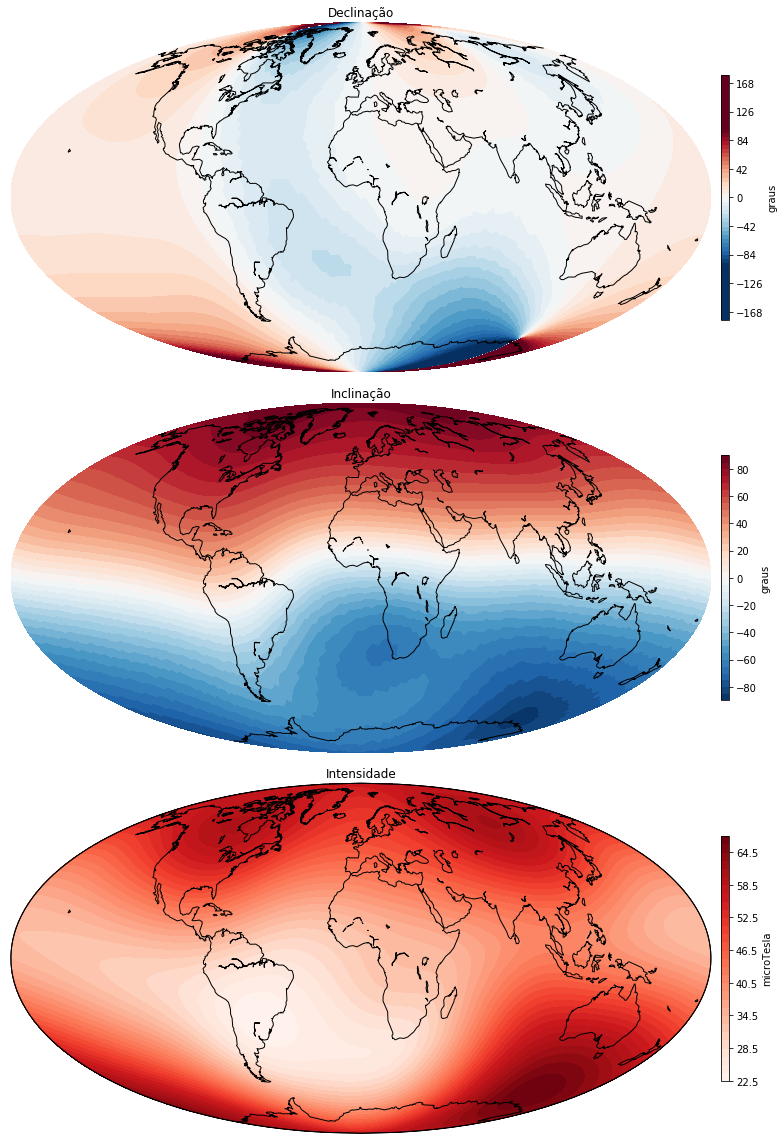

In [6]:
dado = igrf[igrf.year == 2000]

fig, axes = plt.subplots(3, 1, figsize=(14, 16))
ax1, ax2, ax3 = axes
ax1.set_title(u'Declinação')
ax2.set_title(u'Inclinação')
ax3.set_title('Intensidade')    
plot = bm.contourf(x, y, dado.dec.as_matrix().reshape(shape), 60, vmin=-100, vmax=100, ax=ax1, cmap='RdBu_r')
plt.colorbar(plot, orientation='vertical', aspect=30, shrink=0.7, pad=0.01, ax=ax1).set_label('graus')
bm.drawcoastlines(ax=ax1)
plot = bm.contourf(x, y, dado.inc.as_matrix().reshape(shape), 40, ax=ax2, cmap='RdBu_r')
plt.colorbar(plot, orientation='vertical', aspect=30, shrink=0.7, pad=0.01, ax=ax2).set_label('graus')
bm.drawcoastlines(ax=ax2)
plot = bm.contourf(x, y, dado.int.as_matrix().reshape(shape)*0.001, 40, ax=ax3, cmap='Reds')
plt.colorbar(plot, orientation='vertical', aspect=30, shrink=0.7, pad=0.01, ax=ax3).set_label('microTesla')
bm.drawcoastlines(ax=ax3)
plt.tight_layout()

## O campo magnético induzido em um cubo

Vamos ver como varia o campo magnético induzido em cubo para diferentes inclinações do campo magnético indutor.

Rode as células abaixo para criar um cubo e produzir uma figura interativa.

In [7]:
areacubo = [-400, 400, 400, 1200]
cubo = mesher.Prism(areacubo[0], areacubo[1], -50000, 50000, areacubo[2], areacubo[3])
area = (-1200, 1200, -400, 2000)
xp, yp, zp = gridder.regular(area, (13, 13), z=0)

In [8]:
def total_cubo(inc, suceptibilidade):
    cubo.addprop('magnetization', utils.ang2vec(suceptibilidade, inc, 0))
    def mask(area, v):
        x1, x2, y1, y2 = area
        v[(xp >= x1) & (xp <= x2) & (yp >= y1) & (yp <= y2)] = 0
        return v
    terra = utils.ang2vec(10000, inc, 0)
    bx = mask(areacubo, prism.bx(xp, zp, yp, [cubo]))
    bz = mask(areacubo, prism.bz(xp, zp, yp, [cubo]))
    tx =  bx + terra[0]
    tz =  bz + terra[2]
    fig, axes = plt.subplots(1, 2, sharey='all', figsize=(12, 6))
    ax1, ax2 = axes
    plt.sca(ax1)
    ax1.set_aspect('equal')
    ax2.set_aspect('equal')
    mpl.square(areacubo, fill='grey')
    plt.quiver(xp, yp, bx, bz, linewidth=0.5, 
               scale=50, pivot='middle', angles='xy', scale_units='xy')
    mx, my, mz = utils.ang2vec(suceptibilidade, inc, 0)
    plt.quiver([0], [800], [mx], [mz], linewidth=0.5, color='r',
               scale=1e-1, pivot='middle', angles='xy', scale_units='xy', zorder=1000)
    plt.hlines(0, area[0], area[1], linewidth=3)
    mpl.set_area(area)
    plt.gca().invert_yaxis()
    plt.xlabel('x (m)')
    plt.ylabel('z (m)')
    plt.title('Campo do corpo')    
    plt.sca(ax2)
    mpl.square(areacubo, fill='grey')
    plt.hlines(0, area[0], area[1], linewidth=3, zorder=1)
    plt.quiver(xp, yp, tx, tz, linewidth=0.5, color='b',
               scale=50, pivot='middle', angles='xy', scale_units='xy')
    plt.quiver([0], [800], [mx], [mz], linewidth=0.5, color='r',
               scale=1e-1, pivot='middle', angles='xy', scale_units='xy', zorder=1000)
    plt.quiver([-1000], [-0], [terra[0]], [terra[-1]], linewidth=0.5, color='y',
               scale=50, pivot='middle', angles='xy', scale_units='xy', zorder=1001)
    plt.xlabel('x (m)')
    plt.title('Campo total = corpo + Terra')    
    plt.tight_layout(pad=0)
widgets.interactive(total_cubo, inc=widgets.IntSlider(min=-90, max=90, step=5, value=45),
                    suceptibilidade=widgets.IntSlider(min=0, max=50, step=10, value=0))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT00NSwgZGVzY3JpcHRpb249dSdpbmMnLCBtYXg9OTAsIG1pbj0tOTAsIHN0ZXA9NSksIEludFNsaWRlcih2YWx1ZT0wLCBkZXPigKY=


### Sobre a figura

* A figura da **esquerda** mostra o cubo (em cinza). A linha preta é a superfície (z = 0). 
* Na presença de um campo externo indutor, o corpo se magnetiza e gera um campo magnético. Esse campo será mostrado nessa figura em setas pretas.
* A figura da **direita** mostra o campo total presente, ou seja, o campo externo indutor (como o campo da Terra, por exemplo) mais o campo do cubo.
* A seta amarela na figura da direita mostra o campo da Terra.
* As setas vermelhas mostram a magnetização induzida no cubo pelo campo da Terra.
* O botão `inc` controla a inclinação do campo magnético indutor (o da Terra). 
* O botão `suceptibilidade` controla a susceptibilidade magnética do corpo (o quanto ele se magnetiza na presença de um campo indutor).
* A **anomalia magnética de campo total** é a diferença entre as **amplitudes** do campo total (azul na figura da direita) e o campo da Terra.